In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

%matplotlib inline

In [2]:
# Carregar o dataset

titanic = pd.read_csv('data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df_one = pd.get_dummies(titanic['Sex'])
df_two = pd.concat((df_one, titanic), axis=1)
df_two = df_two.drop('Sex', axis = 1)
df_two = df_two.drop('male', axis = 1)
result = df_two.rename(columns={'female': 'Sex'})
result.head()
# 0 - male
# 1 - female
titanic_result = result
titanic_result.head()

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [59]:
titanic_result = titanic_result.dropna(subset=['Age'])
x = titanic_result[['Age', 'Fare', 'Sex']]
y = titanic_result['Survived']

In [63]:
x = x.astype('float64')

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    714 non-null    float64
 2   Sex     714 non-null    float64
dtypes: float64(3)
memory usage: 22.3 KB


In [65]:
# O parâmetro 'lilinear' especifica como o sklearn deve encontrar os parâmetros que minimizam o custo
lr = LogisticRegression(solver='liblinear')
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
print('Acurácia média:', scores.mean())

Acurácia média: 0.7758020344287949


<AxesSubplot:xlabel='Age', ylabel='Fare'>

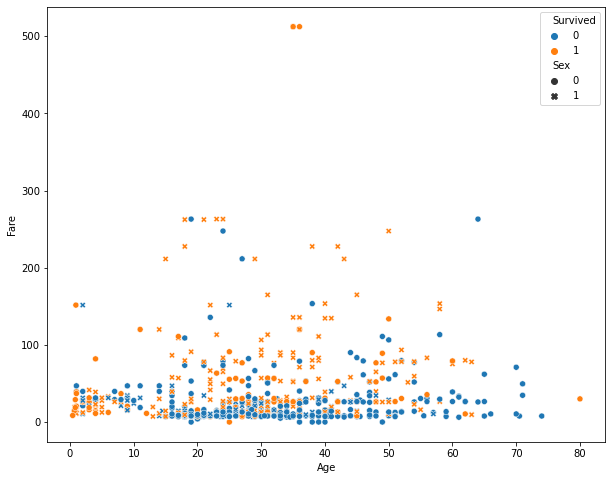

In [66]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_result)

In [72]:
pessoas = [[20, 500, 1], # pessoa 1
           [20, 500, 0]] # pessoa 2
lr.fit(x, y)
print('Classificações:', lr.predict(pessoas))
print('Probabilidades:\n', lr.predict_proba(pessoas))

Classificações: [1 1]
Probabilidades:
 [[8.96406963e-04 9.99103593e-01]
 [8.41559235e-03 9.91584408e-01]]


C:\Users\guIlherme\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\guIlherme\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(70, 120, 'Pessoa 2')

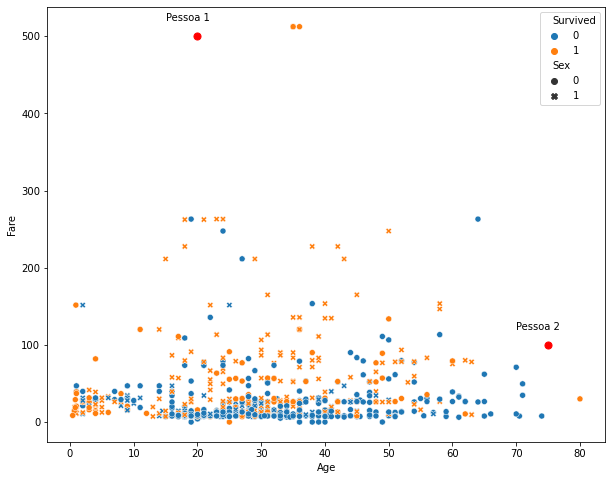

In [68]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_result)
plt.scatter([20, 75], [500, 100], c='red', s=50)
plt.annotate('Pessoa 1', (15, 520))
plt.annotate('Pessoa 2', (70, 120))